In [1]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [2]:
def stacked_plot(X, Y="Approved", a=8, b=3, rows=1, columns=2):
    rcParams['figure.figsize'] = (a, b)
    
    fig, (ax1, ax2) = plt.subplots(rows,columns)
    
    var = train.groupby([X, Y]).XX.sum()
    b=var.unstack().plot(kind='bar',stacked=True,ax=ax1)
    b.set_title(X+" Train (Bar Chart)",weight="bold").set_fontsize('12')
    
    var2 = pd.crosstab(train[X], train[Y]).apply(lambda r: r/r.sum(), axis=1)
    k=var2.plot(kind='bar', stacked=True, ax=ax2 )
    k.set_title(X+" (Stacked Chart)",weight="bold").set_fontsize('12')

In [3]:
def cate_plot(X,a=8,b=3,order=None, rows=1, columns=3):
    rcParams['figure.figsize'] = (a, b)
    fig, (ax1, ax2, ax3) = plt.subplots(rows,columns)
    sns.countplot(X,data=train,ax=ax1, order=order)
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.1f}%'.format(100.*y/len(train)), (x.mean(), y), ha='center', va='bottom')
    ax1.set_title('Train')
    sns.countplot(X,data=test,ax=ax2, order=order)
    for p in ax2.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax2.annotate('{:.1f}%'.format(100.*y/len(test)), (x.mean(), y), ha='center', va='bottom')
    ax2.set_title('Test')
    sns.countplot(X,data=data,ax=ax3, order=order)
    ax3.set_title('Data')
    for p in ax3.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax3.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')

In [4]:
def cont_plot(X,a=8,b=3, rows=1, columns=3):
    rcParams['figure.figsize'] = (a, b)
    fig, (ax1, ax2, ax3) = plt.subplots(rows,columns)
    sns.distplot(train[~train[X].isnull()][X],ax=ax1)
    ax1.set_title('Train')
    sns.distplot(test[~test[X].isnull()][X],ax=ax2)
    ax2.set_title('Test')
    sns.distplot(data[~data[X].isnull()][X],ax=ax3)
    ax3.set_title('Data')

In [5]:
def details_cat(var):

    print ("Count :")
    print ("Data: " + str(data[var].nunique()) + "  Train: "+ str(train[var].nunique())+
           "  Test: "+ str(test[var].nunique()))

    print ("\nValue Counts :")
    train[var].value_counts()

    print("\nCrosstab :")
    print (pd.crosstab(train[var], train["Approved"]))

In [6]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
from sklearn.cross_validation import train_test_split


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import math

import warnings
warnings.filterwarnings('ignore')

C:\Users\humai\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
random.seed(3)

In [8]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [9]:
train= pd.read_csv("Data/train.csv")
test= pd.read_csv("Data/test.csv")
sample= pd.read_csv("Data/sample.csv")

In [10]:
train.Lead_Creation_Date= pd.to_datetime(train.Lead_Creation_Date)
train['Lead_day']= train.Lead_Creation_Date.dt.month

test.Lead_Creation_Date= pd.to_datetime(test.Lead_Creation_Date)
test['Lead_day']= test.Lead_Creation_Date.dt.month

In [11]:
train.DOB= pd.to_datetime(train.DOB)
train.DOB= train.DOB.dt.year


test.DOB= pd.to_datetime(test.DOB)
test.DOB= test.DOB.dt.year

train.DOB= 2017- train.DOB
test.DOB= 2017- test.DOB

train.loc[train.DOB<0, 'DOB'] = train[train.DOB<0]['DOB'].apply(lambda x: x+100)
test.loc[test.DOB<0, 'DOB'] = test[test.DOB<0]['DOB'].apply(lambda x: x+100)

data_age=pd.concat([train, test])
data_age['DOB']= pd.cut(data_age['DOB'], bins= 15)
train.DOB= data_age.DOB[:train.shape[0]]
test.DOB= data_age.DOB[test.shape[0]:]

train.dropna(subset=['DOB'], inplace=True)

In [12]:
train.drop(train.index[train.Loan_Period==6], inplace=True)
test.drop(test.index[test.Loan_Period==6], inplace=True)

train.loc[train['Existing_EMI']==0, 'Existing_EMI']  = 'NaN'
test.loc[test['Existing_EMI']==0, 'Existing_EMI'] = 'NaN'

In [13]:
data=pd.concat([train, test])
data["XX"] = 1
train["XX"] = 1

In [14]:
print (train.columns)
print (test.columns)
print (sample.columns)

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved', 'Lead_day',
       'XX'],
      dtype='object')
Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Lead_day'],
      dtype='object')
Index(['ID', 'Approved'], dtype='object')


In [15]:
print ("Train----------------------------->")
print (train.info())

print ("Test------------------------------>")
print (test.info())

print ("Data------------------------------>")
print (data.info())

Train----------------------------->
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69697 entries, 0 to 69712
Data columns (total 24 columns):
ID                                     69697 non-null object
Gender                                 69697 non-null object
DOB                                    69697 non-null category
Lead_Creation_Date                     69697 non-null datetime64[ns]
City_Code                              68883 non-null object
City_Category                          68883 non-null object
Employer_Code                          65694 non-null object
Employer_Category1                     65694 non-null object
Employer_Category2                     65414 non-null float64
Monthly_Income                         69697 non-null float64
Customer_Existing_Primary_Bank_Code    60321 non-null object
Primary_Bank_Type                      60321 non-null object
Contacted                              69697 non-null object
Source                                 69697 non-n

In [16]:
print ("Train Unique Values------------------>")
unique_values = pd.DataFrame(train.columns, columns=["Column"])
unique_values["Type"] = unique_values["Column"].apply(lambda x: train[x].dtype)
unique_values["UniqueValues"] = unique_values["Column"].apply(lambda x: train[x].nunique())
print (unique_values)

print ("\nTest Unique Values------------------>")
unique_values = pd.DataFrame(test.columns, columns=["Column"])
unique_values["Type"] = unique_values["Column"].apply(lambda x: test[x].dtype)
unique_values["UniqueValues"] = unique_values["Column"].apply(lambda x: test[x].nunique())
print (unique_values)

Train Unique Values------------------>
                                 Column            Type  UniqueValues
0                                    ID          object         69697
1                                Gender          object             2
2                                   DOB        category            15
3                    Lead_Creation_Date  datetime64[ns]            92
4                             City_Code          object           678
5                         City_Category          object             3
6                         Employer_Code          object         36617
7                    Employer_Category1          object             3
8                    Employer_Category2         float64             4
9                        Monthly_Income         float64          5010
10  Customer_Existing_Primary_Bank_Code          object            57
11                    Primary_Bank_Type          object             2
12                            Contacted          ob

In [17]:
train.Approved.value_counts()

0    68677
1     1020
Name: Approved, dtype: int64

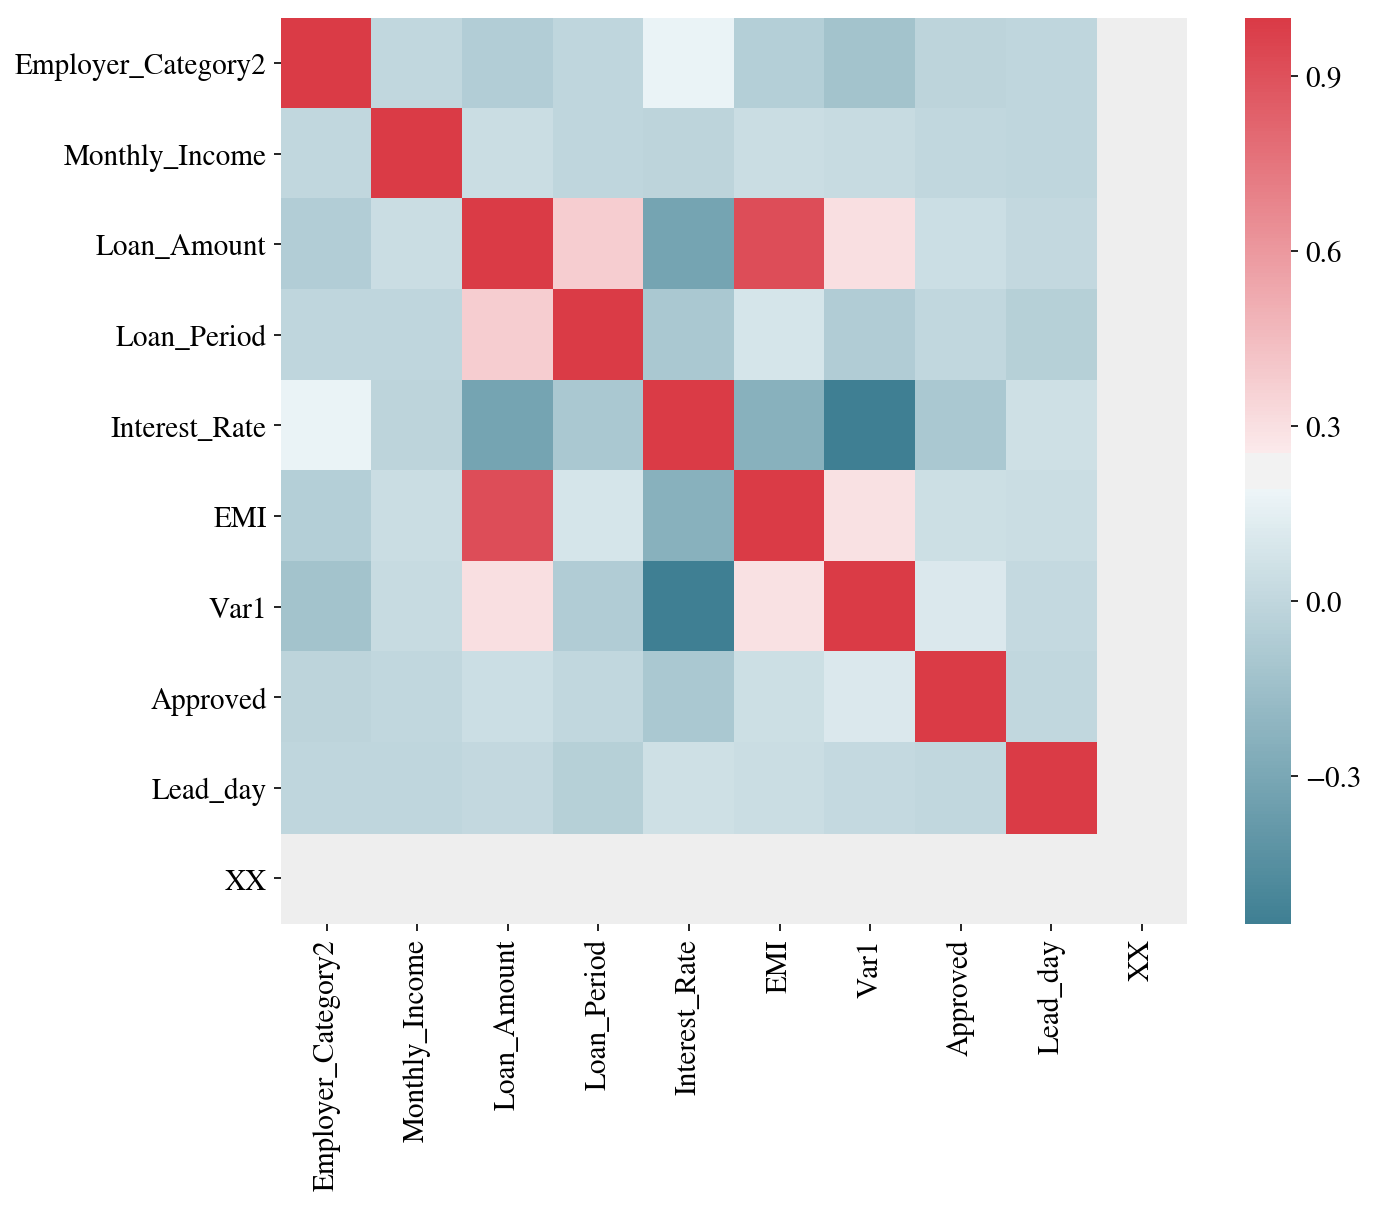

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

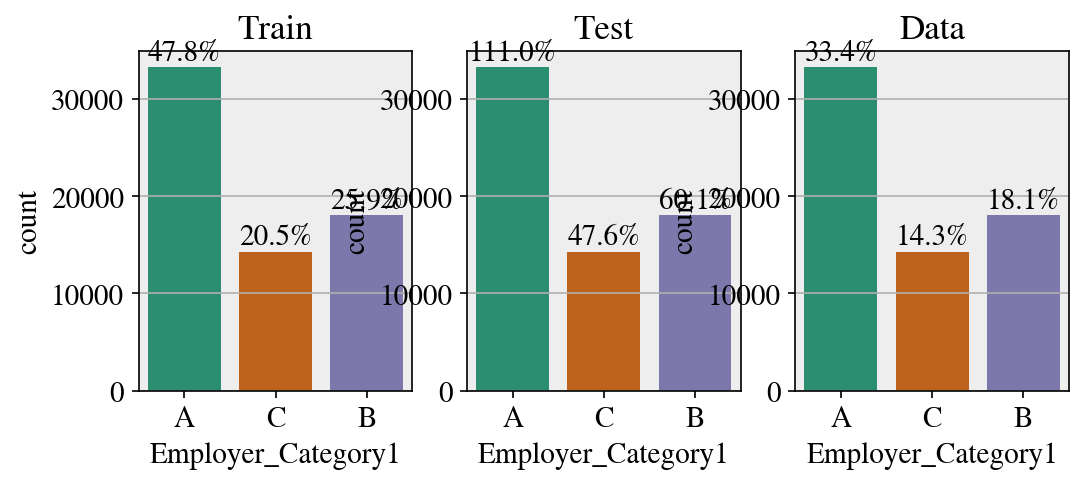

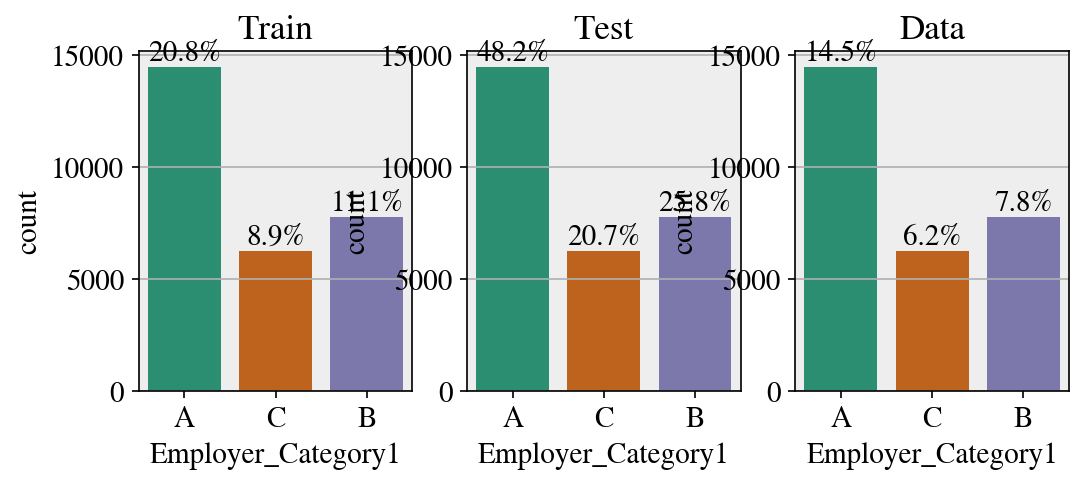

In [19]:
cate_plot(train['Employer_Category1'])
cate_plot(test['Employer_Category1'])

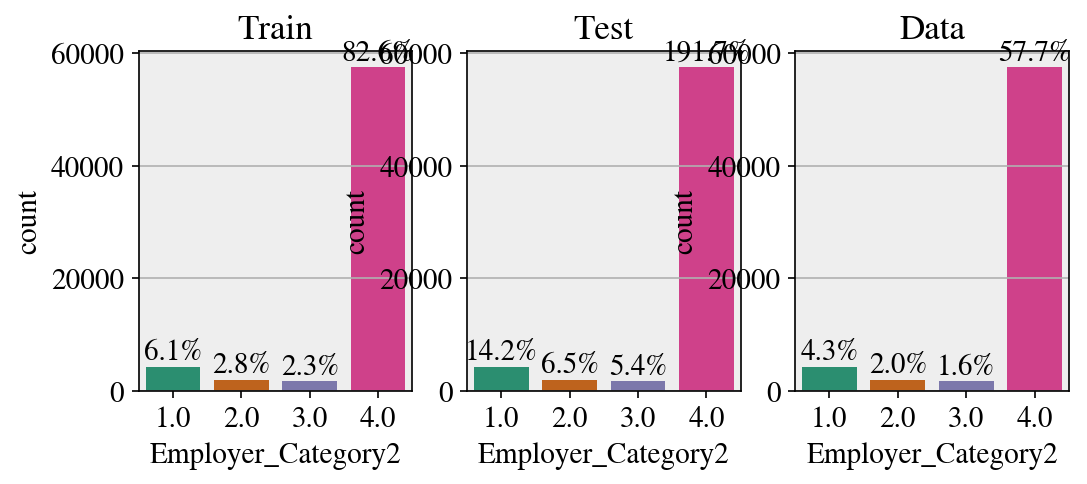

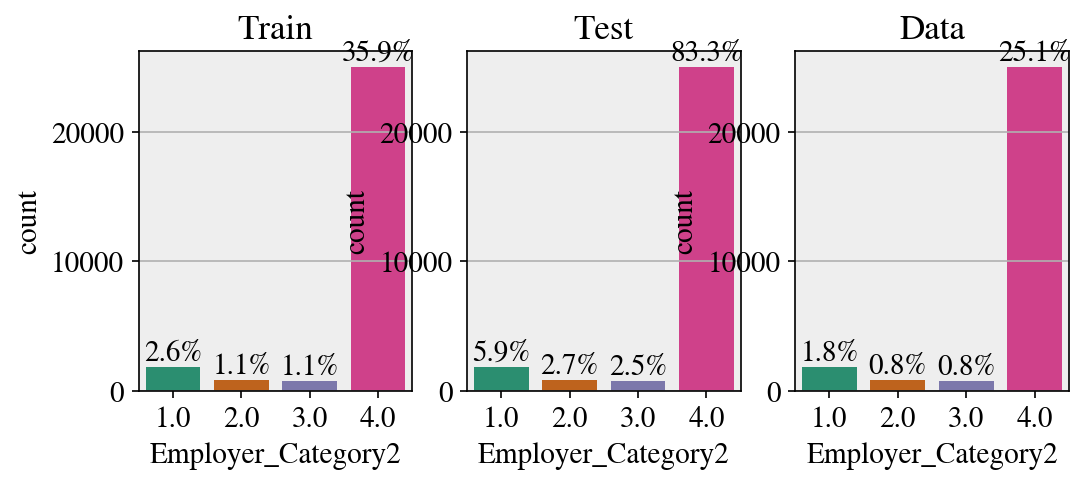

In [20]:
cate_plot(train['Employer_Category2'])
cate_plot(test['Employer_Category2'])

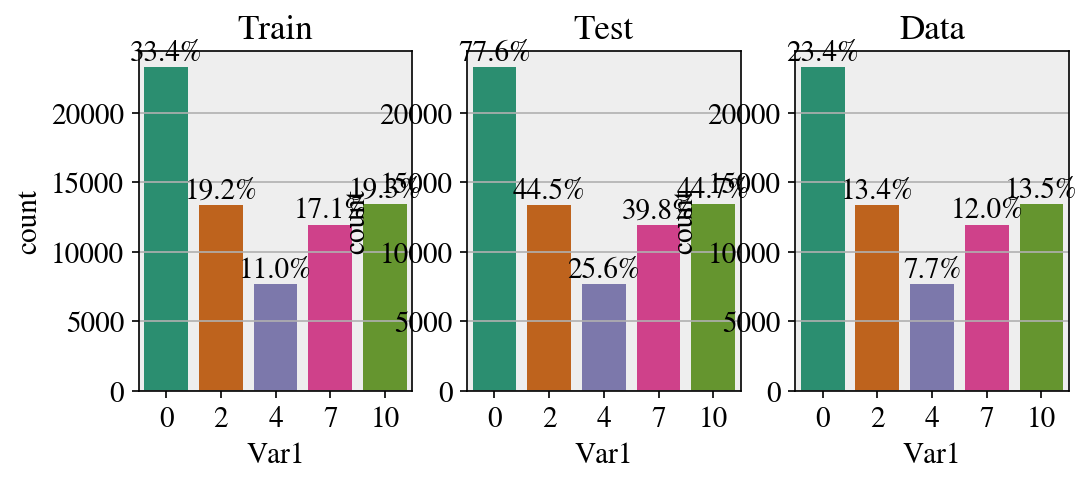

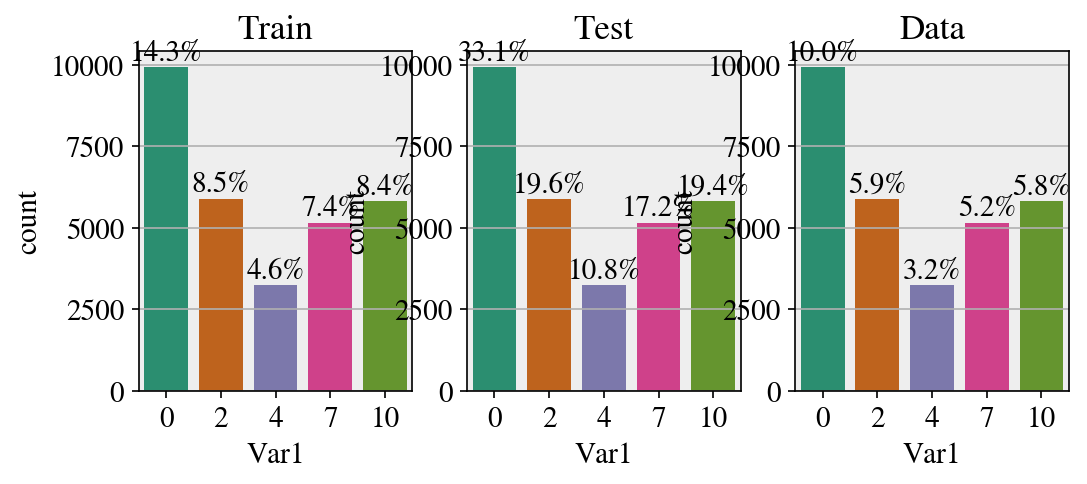

In [21]:
cate_plot(train['Var1'])
cate_plot(test['Var1'])